In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width * height или perimeter Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
 [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

In [54]:
def preprocess_data(df_name):
    df = pd.read_csv("archive/" + name + "_Historical_StockPrice2.csv")
    n_missing_val = df.isna().sum().sum()
    print("Number of missing values in", df_name, df.isna().sum().sum())
    if (n_missing_val > 0):
        df.fillna(0, inplace=True)
        print("Missing values are filled with zeroes")
    return df

In [55]:
df_dict = {}
for name in ['Amazon', 'Apple', 'Facebook', 'Google', 'Netflix'] :
    df_dict[name] = preprocess_data(name)

Number of missing values in Amazon 0
Number of missing values in Apple 0
Number of missing values in Facebook 0
Number of missing values in Google 0
Number of missing values in Netflix 0


In [64]:
plt.rcParams['figure.figsize'] = (20, 10)

In [57]:
%matplotlib inline

In [58]:
df_dict['Amazon'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [59]:
amazon = df_dict['Amazon'].copy()

In [60]:
amazon.Date = pd.to_datetime(amazon.Date)

In [61]:
amazon.Date

0      2016-03-28
1      2016-03-29
2      2016-03-30
3      2016-03-31
4      2016-04-01
          ...    
1255   2021-03-22
1256   2021-03-23
1257   2021-03-24
1258   2021-03-25
1259   2021-03-26
Name: Date, Length: 1260, dtype: datetime64[ns]

In [62]:
amazon = df_dict['Amazon']
mask = ((amazon.Date >= '2020-01-01') & (amazon.Date < '2020-05-01'))
amazon_2020 = amazon[mask]

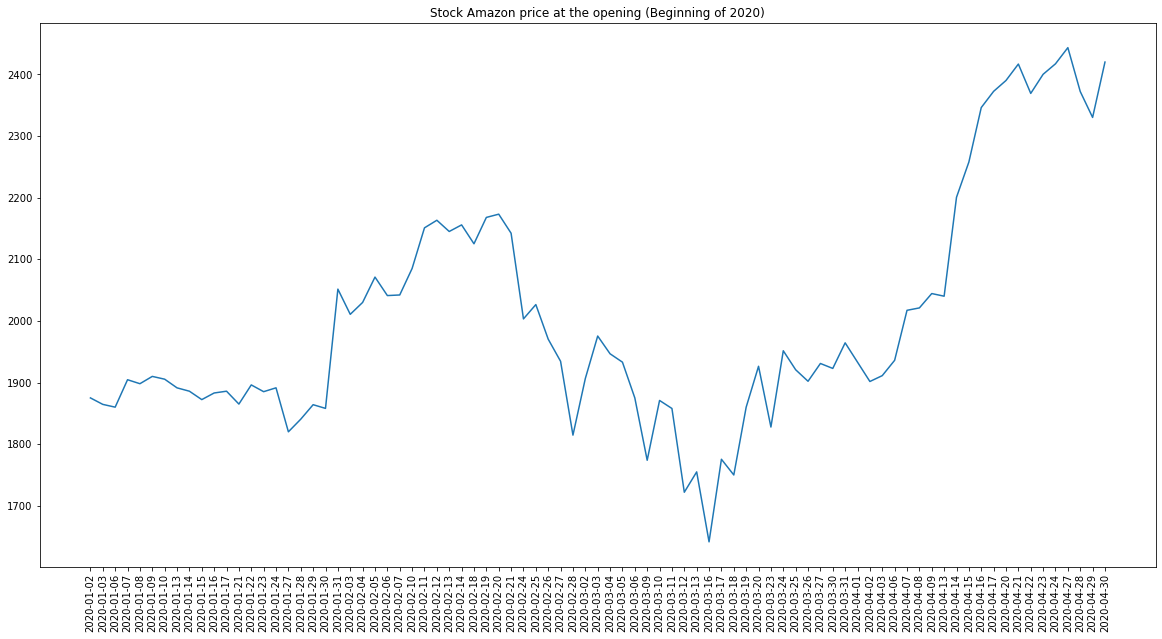

In [65]:
plt.plot(amazon_2020.Date, amazon_2020.Open)
plt.xticks(rotation=90)
plt.title('Stock Amazon price at the opening (Beginning of 2020)')
plt.show()

Гипотеза 1: Акции Амазона в этот период росли, а не падали, потому что во время пандемии online-shopping стал популярнее.

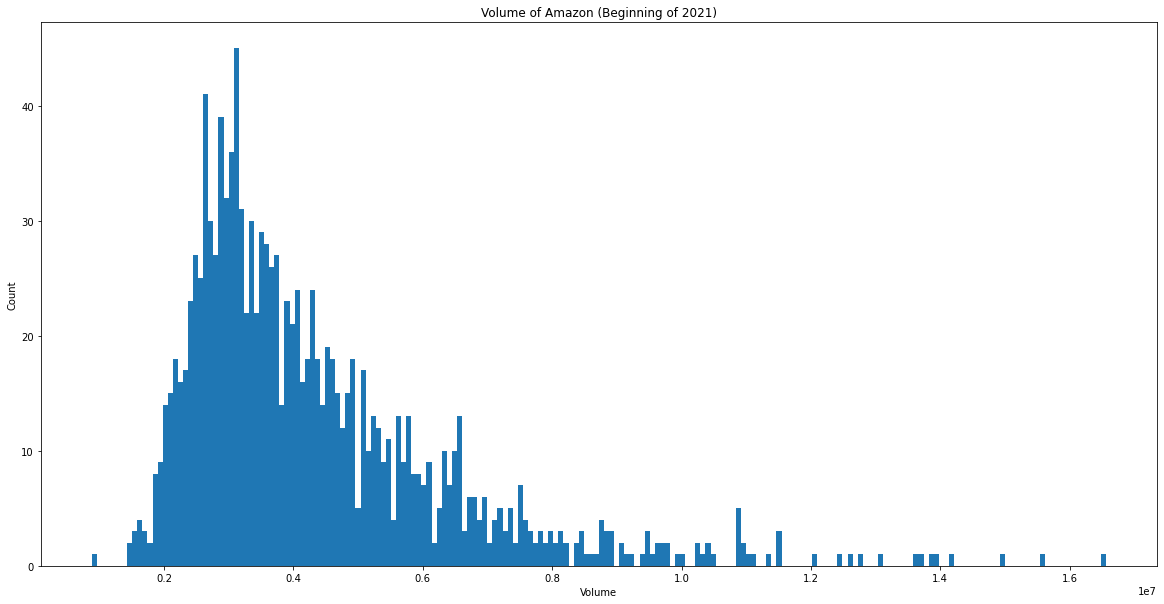

In [99]:
plt.hist(amazon.Volume, 
         bins=200
        )
plt.title('Volume of Amazon (Beginning of 2021)')
plt.xlabel('Volume')
plt.ylabel('Count')
plt.show()

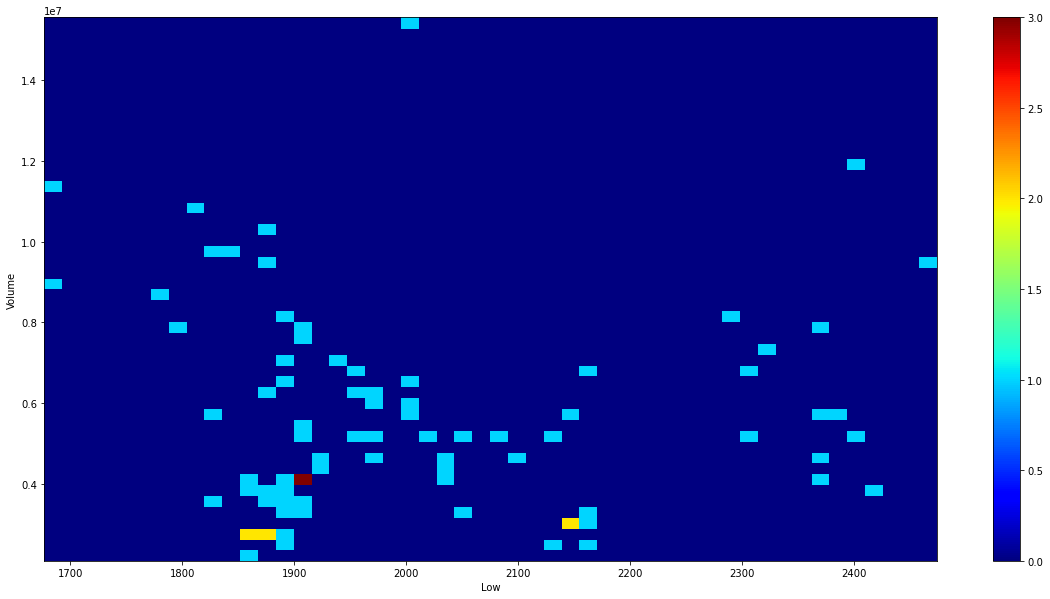

In [91]:
plt.hist2d(amazon_2020['Adj Close'], 
           amazon_2020['Volume'], 
           bins=(50, 50),
           cmap=plt.cm.jet
          )
# Low
plt.xlabel('Low')
plt.ylabel('Volume')
plt.colorbar()
plt.show()

Text(0, 0.5, 'Volume')

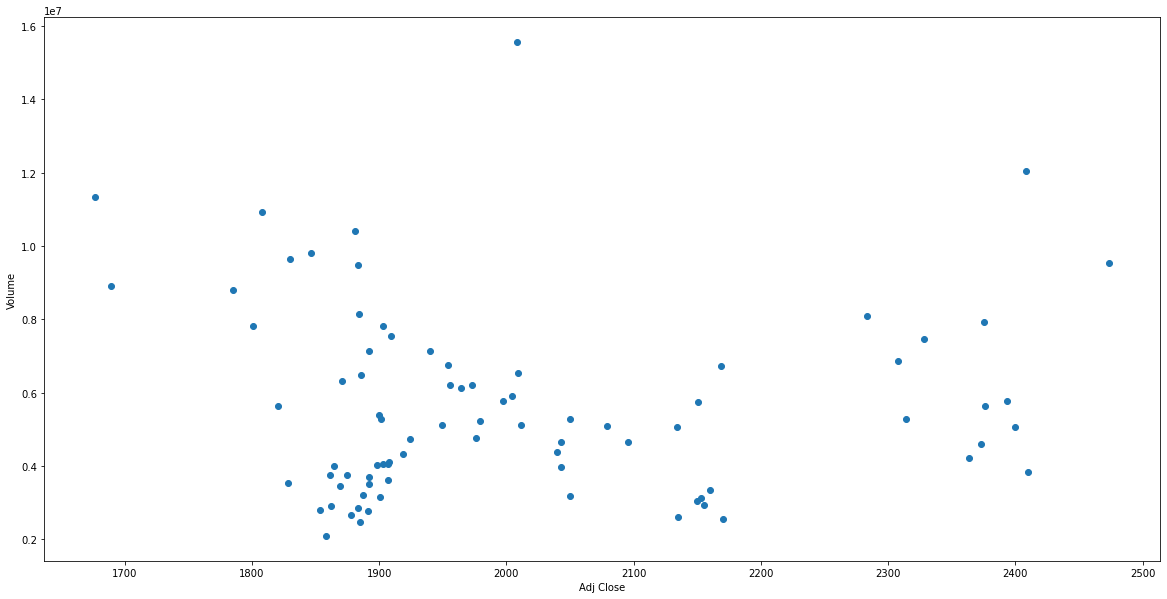

In [66]:
plt.scatter(amazon_2020['Adj Close'], 
            amazon_2020['Volume']
           )
plt.xlabel('Adj Close')
plt.ylabel('Volume')

Гипотеза 2 : В таблице больше записей, у которых небольшая средняя цена.

In [95]:
amazon_features

,Open,High,Low,Close,Adj Close,Volume
0,584.400024,584.750000,575.559998,579.869995,579.869995,3121500
1,580.150024,595.849976,576.500000,593.859985,593.859985,4392600
2,596.710022,603.239990,595.000000,598.690002,598.690002,3890500
3,599.280029,600.750000,592.210022,593.640015,593.640015,2681800
4,590.489990,599.030029,588.299988,598.500000,598.500000,2917400
...,...,...,...,...,...,...
1255,3067.850098,3126.580078,3060.050049,3110.870117,3110.870117,2902200
1256,3127.000000,3182.000000,3120.850098,3137.500000,3137.500000,3817300
1257,3151.040039,3160.310059,3085.149902,3087.070068,3087.070068,2959000
1258,3072.989990,3109.780029,3037.139893,3046.260010,3046.260010,3563500


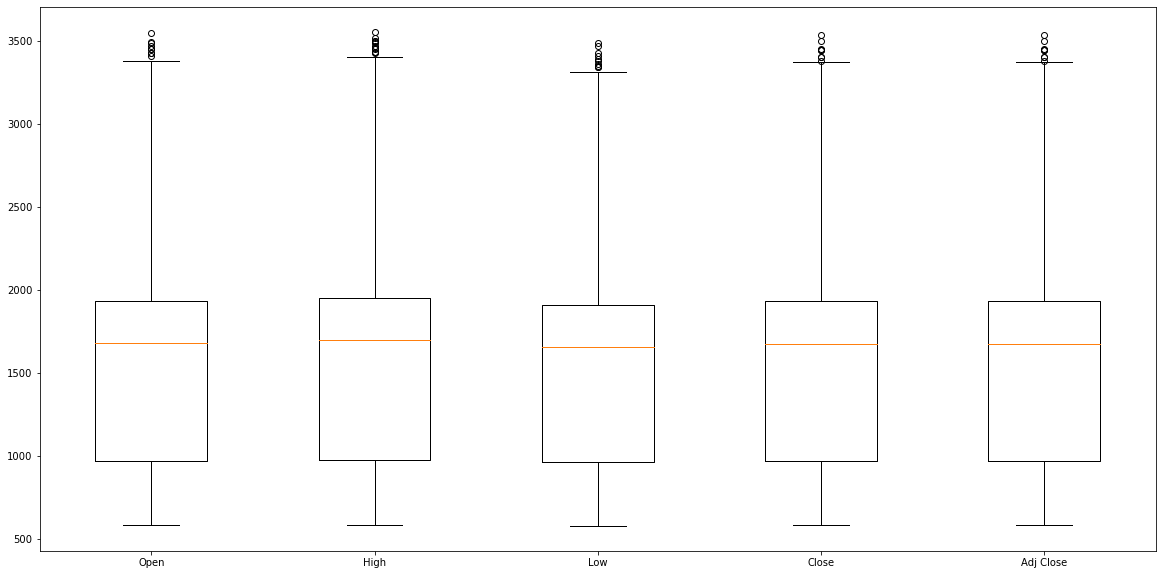

In [98]:
amazon_features = amazon.loc[:, ((amazon.columns != 'Date') & (amazon.columns != 'Volume')) ]
plt.boxplot(amazon_features, labels=amazon_features.columns)
plt.show()

In [151]:
amazon.assign(Squared_Deviation = lambda x: (amazon.Close.mean() - amazon.Close)**2)

,Date,Open,High,Low,Close,Adj Close,Volume,Squared_Deviation
0,2016-03-28,584.400024,584.750000,575.559998,579.869995,579.869995,3121500,1.202608e+06
1,2016-03-29,580.150024,595.849976,576.500000,593.859985,593.859985,4392600,1.172120e+06
2,2016-03-30,596.710022,603.239990,595.000000,598.690002,598.690002,3890500,1.161684e+06
3,2016-03-31,599.280029,600.750000,592.210022,593.640015,593.640015,2681800,1.172596e+06
4,2016-04-01,590.489990,599.030029,588.299988,598.500000,598.500000,2917400,1.162094e+06
...,...,...,...,...,...,...,...,...
1255,2021-03-22,3067.850098,3126.580078,3060.050049,3110.870117,3110.870117,2902200,2.057404e+06
1256,2021-03-23,3127.000000,3182.000000,3120.850098,3137.500000,3137.500000,3817300,2.134507e+06
1257,2021-03-24,3151.040039,3160.310059,3085.149902,3087.070068,3087.070068,2959000,1.989695e+06
1258,2021-03-25,3072.989990,3109.780029,3037.139893,3046.260010,3046.260010,3563500,1.876230e+06


In [152]:
amazon = amazon.assign(Squared_Deviation = lambda x: (amazon.Close.mean() - amazon.Close)**2)

Квадрат отклонения - полезная величина. Она может быть использована, например, для расчета волантильности

Посчитаем историческую волантильность акций Amazon

In [144]:
np.sqrt((((amazon.Close.mean() - amazon.Close)**2).sum())/df.shape[0])

57.822434331914955

In [155]:
amazon.to_csv("out/amazon.csv")

# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

In [1]:
import random as rnd

In [2]:
rnd.seed(123)

In [3]:
from scipy.interpolate import interp1d

In [15]:
k = rnd.randint(10,20)
magic_const = 31

In [16]:
x = [rnd.random() * magic_const for _ in range(k)]
y = [rnd.random() * magic_const for _ in range(k)]

In [17]:
x

[0.05178716095590852,
 13.52454959587177,
 2.716018492263109,
 18.525583399127704,
 2.1661858052346554,
 9.779228185811762,
 13.897972957515256,
 28.067358220819465,
 2.875701402733348,
 4.407426997376533,
 24.49222717512285,
 0.6583152193266666]

In [18]:
y

[28.245666990799943,
 17.77565065610874,
 8.224972863108462,
 25.972966970049168,
 23.83263717187949,
 10.647326902834902,
 24.846394330053023,
 6.412736590649454,
 18.87597831190715,
 16.339323517003915,
 25.08949426395795,
 9.773157718695632]

In [19]:
plt.rcParams['figure.figsize'] = (20, 10)

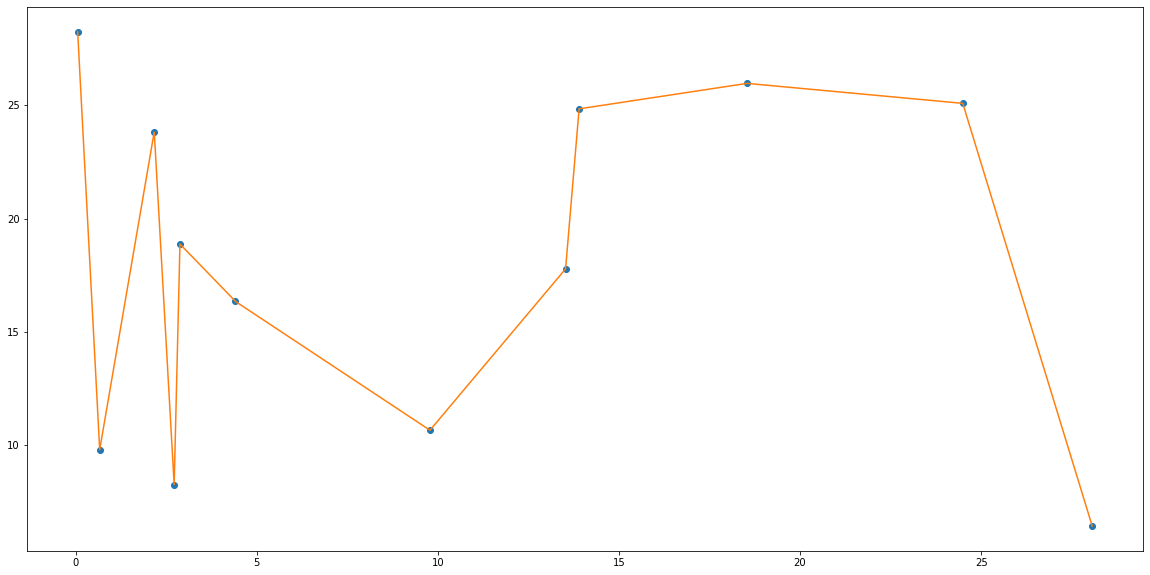

In [20]:
f1 = interp1d(x, y, kind='linear')

xnew = np.linspace(min(x), max(x), num=10000, endpoint=True)

plt.plot(x, y, 'o', xnew, f1(xnew), '-')

plt.show()

Линейная интерполяция: реализация начинается с 618 строки в файле interpolate.py (def _call_linear)
    (https://github.com/scipy/scipy/blob/master/scipy/interpolate/interpolate.py)

Реализуем интерполяционный многочлен Лагранжа:

In [23]:
def my_lagrange_polynom(X, Y):
    def get_frac(x, xi):
        numerator = 1
        denominator = 1
        for xx in X:
            if (xx != xi):
                numerator *= (x - xx)
        for xx in X:
            if (xx != xi):
                denominator *= (xi - xx)
        return numerator / denominator    
            
    def func(x):
        res = 0
        for i,y in enumerate(Y):
            res += y * get_frac(x, X[i])
        return res
    return func

In [25]:
from scipy.interpolate import lagrange

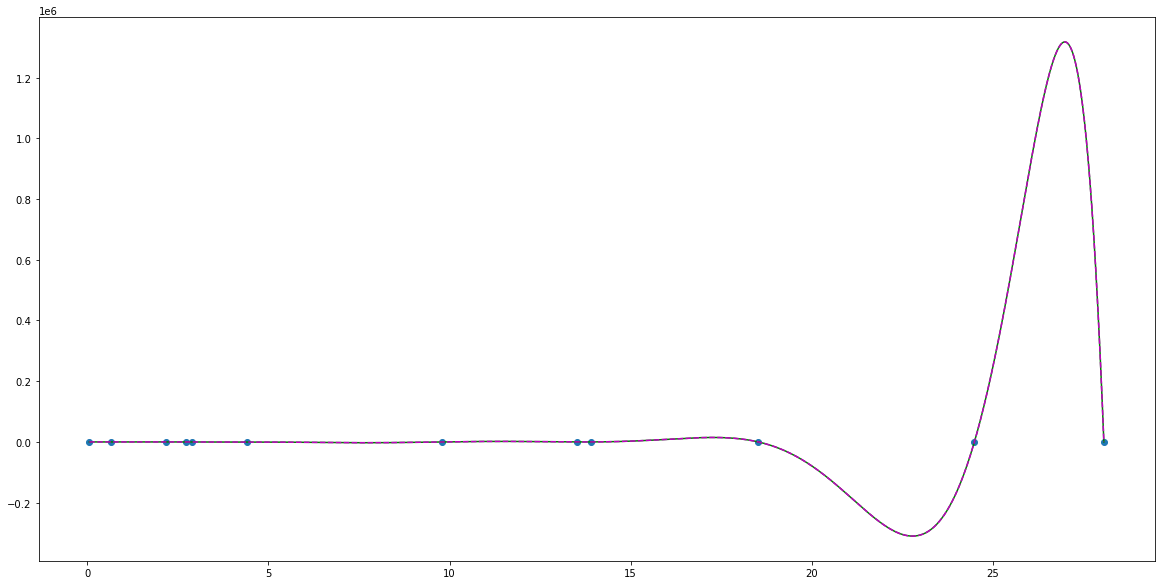

In [33]:
f1 = my_lagrange_polynom(x, y)
f2 = lagrange(x, y)
newx = np.linspace(min(x), max(x), num=10000, endpoint=True)

plt.plot(x, y, 'o', xnew, f1(xnew), 'g-', xnew, f2(xnew), 'm--')

plt.show()

Интерполяционный многочлен Лагранжа: реализация начинается с 25 строки в файле interpolate.py 
    (https://github.com/scipy/scipy/blob/master/scipy/interpolate/interpolate.py)

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


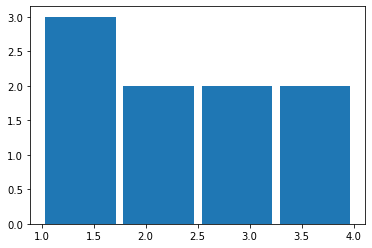

In [4]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=len(set(array)), 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [3]:
import random as rnd

In [4]:
rnd.seed(123)

In [5]:
from typing import List, Tuple, Union
from collections import Counter

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    max_elem = max(array)
    min_elem = min(array)
    delta = (max_elem - min_elem) / bins
    bins_labels = np.arange(min_elem, max_elem, delta)
    bins_counts = np.zeros(bins)
    for val in array:
        idx = min(int((val - min_elem) / delta), bins - 1)
        bins_counts[idx] += 1
    return (np.array([int (x) for x in bins_counts]), bins_labels)

<BarContainer object of 3 artists>

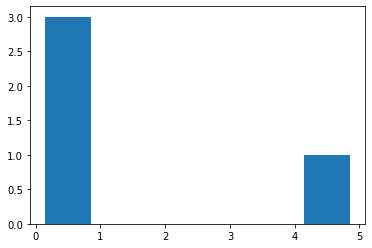

In [7]:
array = [0.5, 0.5, 1.2, 6.5]
value_counts, bins_labels = fast_hist(array, len(set(array)))

plt.bar(bins_labels, value_counts, width = 0.7)

<BarContainer object of 4 artists>

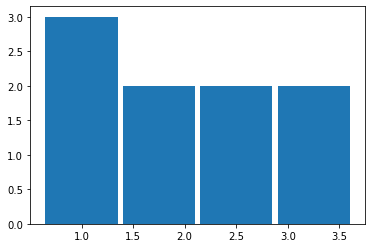

In [38]:
#test1
array = [1,1,2,3,4,1,2,3,4]
value_counts, bins_labels = fast_hist(array, len(set(array)))

plt.bar(bins_labels, value_counts, width = 0.7)

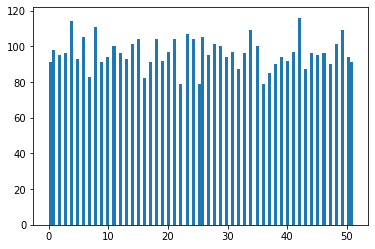

In [41]:
array = [rnd.randint(0, 51) for _ in range(5000)]

value_counts, bins_labels, _ = plt.hist(array, 100)

<BarContainer object of 100 artists>

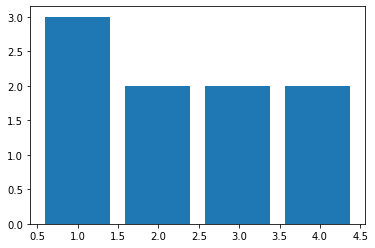

In [6]:
#test2
value_counts, bins_labels = fast_hist(array, 100)

plt.bar(bins_labels, value_counts)

Сравним время:

In [44]:
array = [1,1,2,3,4,1,2,3,4]

4.54 ms ± 420 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.6 µs ± 729 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


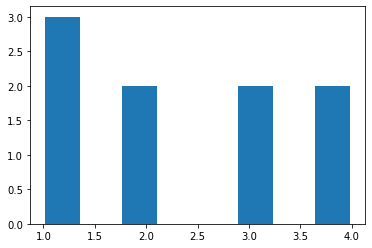

In [53]:
%timeit plt.hist(array, bins=8, rwidth=0.9)
%timeit fast_hist(array, 8)